**DATASET**

The both training and evaluation operations would be handled with [Fec2013](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) dataset. Compressed version of the dataset takes 92 MB space whereas uncompressed version takes 295 MB space. There are 28K training and 3K testing images in the dataset. Each image was stored as 48×48 pixel. The pure dataset consists of image pixels (48×48=2304 values), emotion of each image and usage type (as train or test instance).

In [ ]:
#Unzipping the file
#!tar -xf C:\Users\nazan\Desktop\Facial Recognition\Facial-Expression-Detection-V2-master\Facial-Expression-Detection-V2-master\fer2013.tar.gz
!tar -xf C:\Users\nazan\Desktop\FacialRecognition\Facial-Expression-Detection-V2-master\Facial-Expression-Detection-V2-master\fer2013.tar.gz
#!tar -xf /content/drive/My\ Drive/fer2013.tar.gz

In [ ]:
from platform import python_version
print(python_version())

In [ ]:
# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#tensorflow 1.8, keras 2.1.5 python 3.6
import tensorflow as tf
import
import keras

In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#------------------------------
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#------------------------------
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 25
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

with open("fer2013/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights
	
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------



c:\users\nazan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nazan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nazan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\nazan\appd

number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Epoch 1/25
 30/256 [==>...........................] - ETA: 3:41 - loss: 1.8392 - acc: 0.2405

KeyboardInterrupt: 

In [ ]:
#Saving the model
model.save('model25.h5')

In [ ]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

In [ ]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

In [ ]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

# ~ Start Here ~

In [1]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


from keras.models import load_model

import cv2
import urllib.request
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from time import sleep
import serial

import matplotlib.pyplot as plt
import numpy as np

model = load_model('model25.h5')

Using TensorFlow backend.
c:\users\nazan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nazan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nazan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

### Analyse a photo

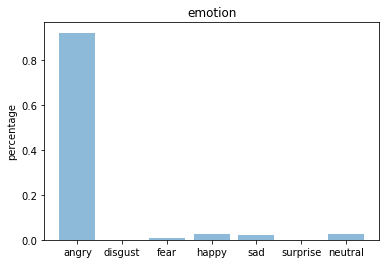

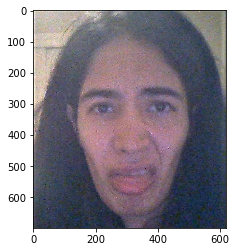

In [3]:
#Testing a file.

file = 'photo3.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [3]:
#ranodom stuff
facedata = 'C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(facedata)

img = cv2.imread('C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\1.jpg')
minisize = (img.shape[1],img.shape[0])
miniframe = cv2.resize(img, minisize)

faces = cascade.detectMultiScale(miniframe)

### Crop a photo to only include the face

In [6]:

            
def facecrop(image):  
    #facedata = r"C:\Users\nazan\Desktop\FacialRecognition\Facial-Expression-Detection-V2-master\Facial-Expression-Detection-V2-master\haarcascade_frontalface_default.xml"
    facedata = 'C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\haarcascade_frontalface_alt.xml'

    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)



facecrop(r'C:\Users\nazan\Desktop\FacialRecognition\Facial-Expression-Detection-V2-master\Facial-Expression-Detection-V2-master\1.jpg')


### Function for webcam to take a photo -> have to fix

In [ ]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#### running the above cell to have webcam take a photo

In [ ]:
take_photo()

## Video Tester (webcam)

In [4]:
#video tester

face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\haarcascade_frontalface_alt.xml')

url='http://192.168.0.17:8080/shot.jpg'
#cap=urllib.request.urlopen(url)
cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image

    
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

### Video Tester (phoneCamera)

In [7]:
#video tester

face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\haarcascade_frontalface_alt.xml')

url='http://143.215.123.130:8080/shot.jpg'
#cap=urllib.request.urlopen(url)
cap=cv2.VideoCapture(0)

while True:
    #ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    
    test=np.array(bytearray(urllib.request.urlopen(url).read()),dtype=np.uint8)
    img=cv2.imdecode(test,-1)
    
    test_img=cv2.imdecode(test,-1)
    #test_img=cv2.imshow('IPWebcam',img)
    #if cv2.waitKey(1) & 0xFF == ord('q'):
        #break
    

    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

In [ ]:
#random

ser = serial.Serial("COM4", 9600)
#ser.write("hi")
ser.write("yoyo".encode())
time.sleep(6)
s=ser.readline()
print(s)
time.sleep(6)
ser.close()
#while True:
    #print ser.readline()

In [3]:
ser.close()

NameError: name 'ser' is not defined

## reading writing on serial monitor

In [ ]:
ser = serial.Serial('com4', 9600) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
while True:
     counter +=1
     print("python sent",counter)
     ser.write(str(chr(counter)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
     print (ser.readline()) # Read the newest output from the Arduino
     sleep(.1) # Delay for one tenth of a second
     if counter == 255:
         counter = 32

# Moving a Servo

In [4]:

ser = serial.Serial('com4', 9600)
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\haarcascade_frontalface_alt.xml')

url='http://192.168.0.17:8080/shot.jpg'
#cap=urllib.request.urlopen(url)
cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image

    
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    
        if predicted_emotion=='happy':
            print("happy")
            ser.write(str(chr(35)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
            print (ser.readline()) # Read the newest output from the Arduino
            
            #sleep(2) # Delay for one tenth of a second
            
        
        if predicted_emotion=='sad':
            print("sad")
            ser.write(str(chr(30)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
            print (ser.readline()) # Read the newest output from the Arduino
            #sleep(2) # Delay for one tenth of a second
        
        
        if predicted_emotion=='angry':
            print("angry")
            ser.write(str(chr(25)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
            print (ser.readline()) # Read the newest output from the Arduino
            #sleep(2) # Delay for one tenth of a second
            
            
        if predicted_emotion=='surprise':
            print("surprise")
            ser.write(str(chr(20)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
            print (ser.readline()) # Read the newest output from the Arduino
            #sleep(2) # Delay for one tenth of a second
    
    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

sad
b'Hi from Arduino\r\n'
sad
b'I received: 30\r\n'
sad
b'sad I received: 30\r\n'
angry
b'sad I received: 30\r\n'
sad
b'sad I received: 25\r\n'
happy
b'soup I received: 30\r\n'
sad
b'sad I received: 35\r\n'
sad
b'happpppppppppppppppppppp I received: 30\r\n'
sad
b'sad I received: 30\r\n'
sad
b'sad I received: 30\r\n'
sad
b'sad I received: 30\r\n'
sad
b'sad I received: 30\r\n'
sad
b'sad I received: 30\r\n'
angry


SerialException: WriteFile failed (PermissionError(13, 'The device does not recognize the command.', None, 22))

## Servo Denoising

In [31]:

ser = serial.Serial('com4', 9600)
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\nazan\\Desktop\\FacialRecognition\\Facial-Expression-Detection-V2-master\\Facial-Expression-Detection-V2-master\\haarcascade_frontalface_alt.xml')

url='http://192.168.0.17:8080/shot.jpg'
#cap=urllib.request.urlopen(url)
cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image

    
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    
        if predicted_emotion=='happy':
            print("happy")
            ser.write(str(chr(35)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
            print (ser.readline()) # Read the newest output from the Arduino
            sleep(2) # Delay for one tenth of a second
            
        """
        if predicted_emotion=='sad':
            print("sad")
            ser.write(str(chr(30)).encode()) # Convert the decimal number to ASCII then send it to the Arduino
            print (ser.readline()) # Read the newest output from the Arduino
            sleep(2) # Delay for one tenth of a second
        """
    
    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

SerialException: could not open port 'com4': PermissionError(13, 'Access is denied.', None, 5)